## Notebook comportamiento de las heladas 2023 ❄


In [47]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [ ]:
# Ruta al archivo Excel
archivo_excel = "./data/registros_2023.xlsx"

# Leer los nombres de las hojas del archivo
xls = pd.ExcelFile(archivo_excel)
nombres_hojas = xls.sheet_names

# Lista para almacenar los DataFrames de cada hoja
dfs = []

# Iterar sobre cada hoja
for nombre_hoja in nombres_hojas:
    # Leer la hoja específica y saltar las primeras 5 filas
    df_temp = pd.read_excel(archivo_excel, sheet_name=nombre_hoja, skiprows=5)
    # Eliminar la columna 'Unnamed: 2'
    if 'Unnamed: 2' in df_temp.columns:
        df_temp = df_temp.drop(columns=['Unnamed: 2'])
    df_temp.columns = ['Fecha', 'Temperatura [°C]']
    # Agregar una columna con el nombre de la central meteorológica
    df_temp['Central'] = nombre_hoja
    # Añadir el DataFrame a la lista
    dfs.append(df_temp)

# Concatenar todos los DataFrames en uno solo
df_final = pd.concat(dfs, ignore_index=True)

# Mostrar el DataFrame final
print(df_final)

In [49]:
# Dataframe con todas las centrales concatenadas en una sola columna
df_final.head()

,Fecha,Temperatura [°C],Central
0,15-04-2023 00:00,14.4,Cerrito_1
1,15-04-2023 00:10,14.2,Cerrito_1
2,15-04-2023 00:20,13.9,Cerrito_1
3,15-04-2023 00:30,13.7,Cerrito_1
4,15-04-2023 00:40,13.5,Cerrito_1


In [50]:
# Contabilizar por cada central meteorológica la cantidad de NaN
print(df_final.isna().sum())


Fecha               0
Temperatura [°C]    0
Central             0
dtype: int64


In [51]:
# Ver nombre de centrales
print(df_final['Central'].unique())


['Cerrito_1' 'Colonia Celina_2' 'Hasenkamp_3' 'Hernandarias_4'
 'Oro Verde Vieja_7' 'Paraná_8' 'Paso de la Arena_9']


 Centrales de María Grande y Viale sin datos 

In [ ]:
# Realizar un promedio de los regitros por hora

# Primero, verifica si 'Fecha' está en las columnas de df_final
if 'Fecha' in df_final.columns:
    df_final['Fecha'] = pd.to_datetime(df_final['Fecha'])
else:
    print("La columna 'Fecha' no se encuentra en df_final. Verifica el nombre de la columna.")

# Continúa con el resto del código si 'Fecha' existe
if 'Fecha' in df_final.columns:
    # Extraer la hora y posiblemente la fecha para agrupar correctamente
    df_final['Hora'] = df_final['Fecha'].dt.hour
    df_final['FechaSinHora'] = df_final['Fecha'].dt.date

    # Agrupar por 'Central', 'FechaSinHora' y 'Hora' y calcular el promedio de la temperatura
    df_por_hora = df_final.groupby(['Central', 'FechaSinHora', 'Hora'])['Temperatura [°C]'].mean().reset_index()

    # Corregir el nombre de la columna al renombrar
    df_por_hora.rename(columns={'Temperatura [°C]': 'TemperaturaPromedio'}, inplace=True)

    print(df_por_hora)
else:
    print("Corrige el problema con la columna 'Fecha' antes de continuar.")

In [53]:
df_por_hora.head()

,Central,FechaSinHora,Hora,TemperaturaPromedio
0,Cerrito_1,2023-04-15,0,13.850000
1,Cerrito_1,2023-04-15,1,13.400000
2,Cerrito_1,2023-04-15,2,13.183333
3,Cerrito_1,2023-04-15,3,12.866667
4,Cerrito_1,2023-04-15,4,11.400000


In [54]:
# Obtener la temperatura minima por dia
df_min = df_por_hora.groupby(['Central', 'FechaSinHora'])['TemperaturaPromedio'].min().reset_index()
df_min.rename(columns={'TemperaturaPromedio': 'TemperaturaMinima'}, inplace=True)



In [55]:
df_min.head()

,Central,FechaSinHora,TemperaturaMinima
0,Cerrito_1,2023-04-15,9.950000
1,Cerrito_1,2023-04-16,11.783333
2,Cerrito_1,2023-04-17,7.333333
3,Cerrito_1,2023-04-18,8.016667
4,Cerrito_1,2023-04-19,9.383333


### Grafico de temperatura minima desde 15/04/2023 al 15/09/2024 para la central Colonia Celina 

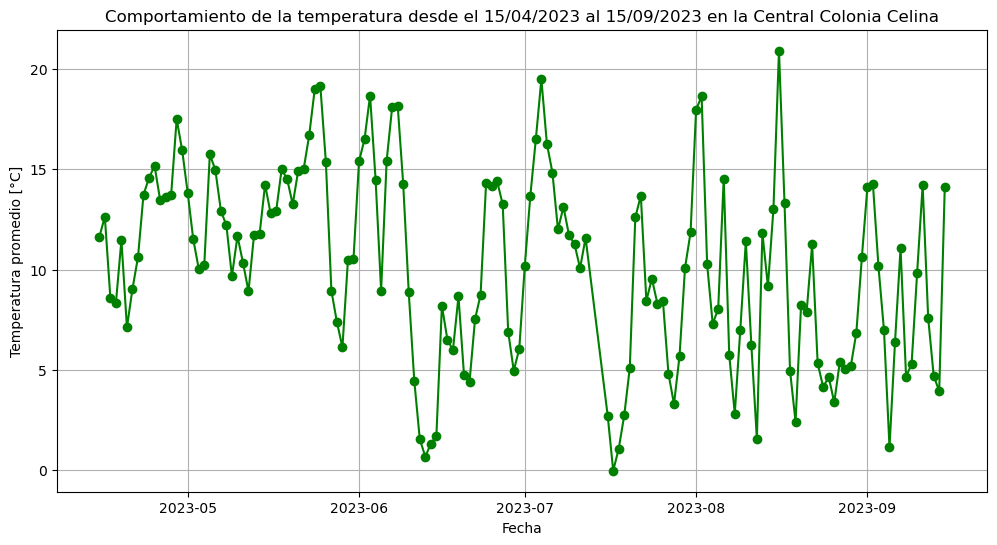

In [56]:

# Filtrar por la central 'Colonia Celina_2'
df_colonia_celina_2 = df_min[df_min['Central'] == 'Colonia Celina_2']

# Filtrar por un rango de fechas específico
fecha_inicio = '2023-04-15'
fecha_fin = '2023-09-15'
# Convert string dates to datetime.date objects
fecha_inicio_date = datetime.strptime(fecha_inicio, '%Y-%m-%d').date()
fecha_fin_date = datetime.strptime(fecha_fin, '%Y-%m-%d').date()

# Now use fecha_inicio_date and fecha_fin_date for comparison
df_colonia_celina_2_rango_fechas = df_colonia_celina_2[(df_colonia_celina_2['FechaSinHora'] >= fecha_inicio_date) & (df_colonia_celina_2['FechaSinHora'] <= fecha_fin_date)]


# Graficar la temperatura promedio
plt.figure(figsize=(12, 6))
plt.plot(df_colonia_celina_2_rango_fechas['FechaSinHora'], df_colonia_celina_2_rango_fechas['TemperaturaMinima'], marker='o', color='green')
plt.title('Comportamiento de la temperatura desde el 15/04/2023 al 15/09/2023 en la Central Colonia Celina')
plt.xlabel('Fecha')
plt.ylabel('Temperatura promedio [°C]')
plt.grid()
plt.show()


### Grafico del comportamiento de la temperatura mínima para el mes de julio de la central Colina Celina 

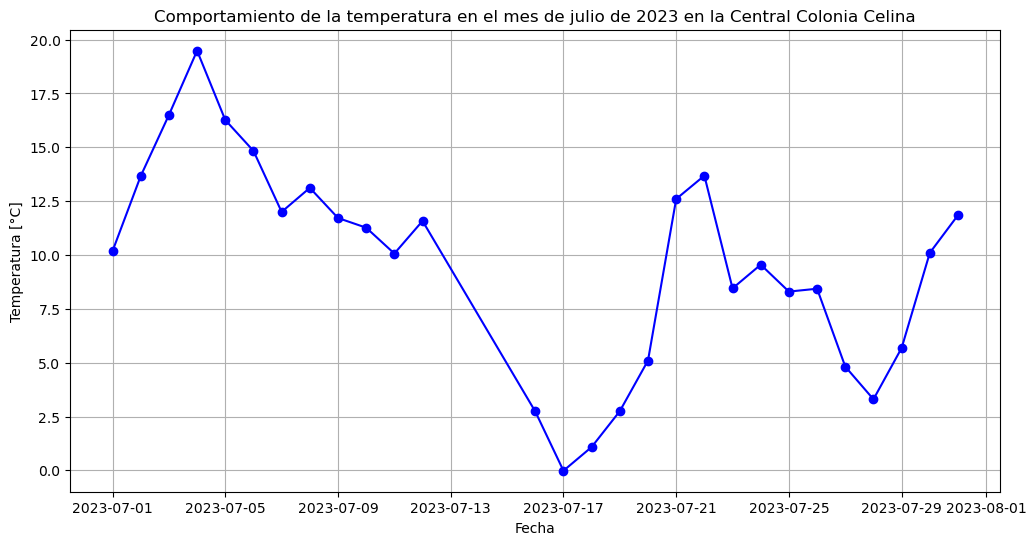

In [57]:
# Graficar solo el mes de Julio del 2023

# Filtrar por el mes de mayo
mayo_inicio = '2023-07-01'
mayo_fin = '2023-07-31'
# Convert string dates to datetime.date objects
mayo_inicio_date = datetime.strptime(mayo_inicio, '%Y-%m-%d').date()
mayo_fin_date = datetime.strptime(mayo_fin, '%Y-%m-%d').date()


df_colonia_celina_2_mayo = df_colonia_celina_2[(df_colonia_celina_2['FechaSinHora'] >= mayo_inicio_date) & (df_colonia_celina_2['FechaSinHora'] <= mayo_fin_date)]

# Graficar la temperatura promedio
plt.figure(figsize=(12, 6))
plt.plot(df_colonia_celina_2_mayo['FechaSinHora'], df_colonia_celina_2_mayo['TemperaturaMinima'], marker='o', color='blue')
plt.title('Comportamiento de la temperatura en el mes de julio de 2023 en la Central Colonia Celina')
plt.xlabel('Fecha')
plt.ylabel('Temperatura [°C]')
plt.grid()
plt.show()



### Grafico del comportamiento de la temperatura de todas las centrales 

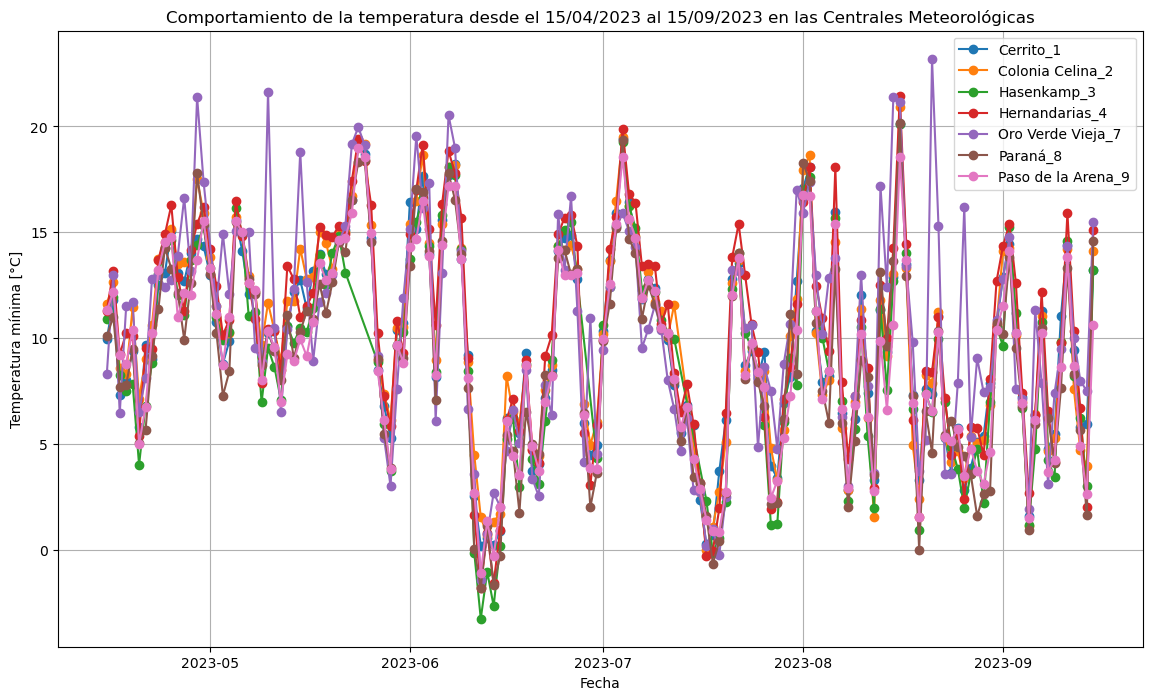

In [58]:
# Graficar todas las centrales meteorológicas en un rango de fecha específico

# Filtrar por un rango de fechas específico
fecha_inicio = '2023-04-15'
fecha_fin = '2023-09-15'
# Convert string dates to datetime.date objects
fecha_inicio_date = datetime.strptime(fecha_inicio, '%Y-%m-%d').date()
fecha_fin_date = datetime.strptime(fecha_fin, '%Y-%m-%d').date()

# Now use fecha_inicio_date and fecha_fin_date for comparison
df_min_rango_fechas = df_min[(df_min['FechaSinHora'] >= fecha_inicio_date) & (df_min['FechaSinHora'] <= fecha_fin_date)]

# Graficar la temperatura minima
plt.figure(figsize=(14, 8))
for central in df_min_rango_fechas['Central'].unique():
    df_temp = df_min_rango_fechas[df_min_rango_fechas['Central'] == central]
    plt.plot(df_temp['FechaSinHora'], df_temp['TemperaturaMinima'], marker='o', label=central)

plt.title('Comportamiento de la temperatura desde el 15/04/2023 al 15/09/2023 en las Centrales Meteorológicas')
plt.xlabel('Fecha')
plt.ylabel('Temperatura mínima [°C]')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()




### Obtener el promedio minimo de la temperatura a partir de todas las centrales y graficarlo

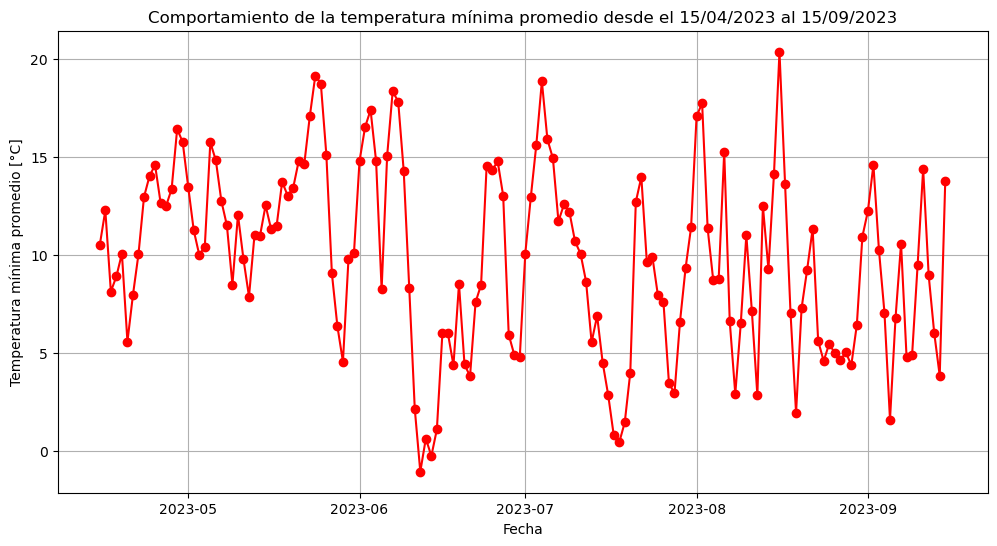

In [59]:
# Promediar la temperatura minima de todas las centrales en un solo dato
df_min_promedio = df_min_rango_fechas.groupby('FechaSinHora')['TemperaturaMinima'].mean().reset_index()

# Graficar la temperatura minima promedio
plt.figure(figsize=(12, 6))
plt.plot(df_min_promedio['FechaSinHora'], df_min_promedio['TemperaturaMinima'], marker='o', color='red')
plt.title('Comportamiento de la temperatura mínima promedio desde el 15/04/2023 al 15/09/2023')
plt.xlabel('Fecha')
plt.ylabel('Temperatura mínima promedio [°C]')
plt.grid()
plt.show()



### Gráfico de la temepratura mínima y la tendencia

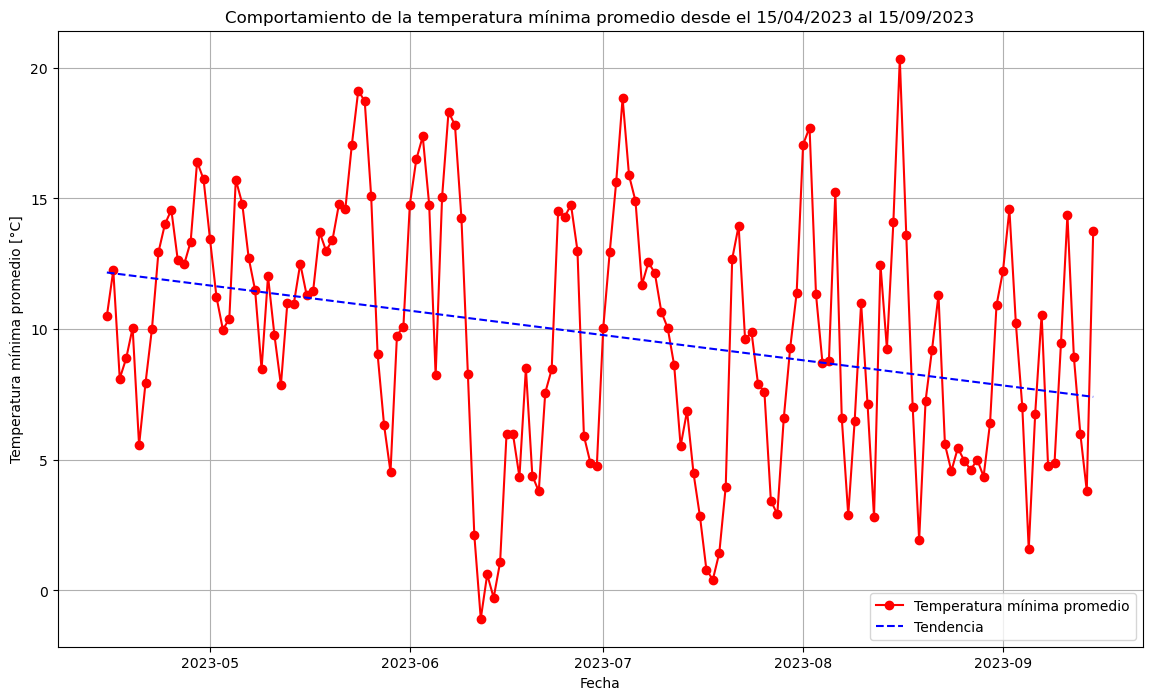

In [60]:

# Calcular la tendencia lineal
tendencia = stats.linregress(np.arange(len(df_min_promedio['TemperaturaMinima'])), df_min_promedio['TemperaturaMinima'])

# Calcular la recta de tendencia
recta_tendencia = tendencia.intercept + tendencia.slope * np.arange(len(df_min_promedio['TemperaturaMinima']))

# Graficar la temperatura minima promedio
plt.figure(figsize=(14, 8))
plt.plot(df_min_promedio['FechaSinHora'], df_min_promedio['TemperaturaMinima'], marker='o', color='red', label='Temperatura mínima promedio')
plt.plot(df_min_promedio['FechaSinHora'], recta_tendencia, linestyle='--', color='blue', label='Tendencia')
plt.title('Comportamiento de la temperatura mínima promedio desde el 15/04/2023 al 15/09/2023')
plt.xlabel('Fecha')
plt.ylabel('Temperatura mínima promedio [°C]')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()
